#### Code
* [Data Exploration](#s1)
* [Data Wrangling](#s2)
* [Data Cleansing and Transformation](#s3)
* [Machine Learning Models](#s4)

#### [Report](#rep)

In [1]:
# Importing packages
import pandas as pd
import numpy as np

# Sklearn
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

# Feature engine
from feature_engine.imputation import RandomSampleImputer
from feature_engine.encoding import OrdinalEncoder
import feature_engine.imputation as mdi
from feature_engine.transformation import YeoJohnsonTransformer
from feature_engine.discretisation import EqualWidthDiscretiser
from feature_engine.outliers import Winsorizer
from feature_engine.encoding import OrdinalEncoder

#Visual
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

### Step 1: Load and Explore the Data <a id = "s1">

In [2]:
#Loading in data
cir = pd.read_csv('./datasets/f1db_csv_mod/circuits_mod.csv')
conr = pd.read_csv('./datasets/f1db_csv_mod/constructor_results_mod.csv')
cons = pd.read_csv('./datasets/f1db_csv_mod/constructor_standings_mod.csv')
con = pd.read_csv('./datasets/f1db_csv_mod/constructors_mod.csv')
dris = pd.read_csv('./datasets/f1db_csv_mod/driver_standings_mod.csv')
dri = pd.read_csv('./datasets/f1db_csv_mod/drivers_mod.csv')
lap = pd.read_csv('./datasets/f1db_csv_mod/lap_times_mod.csv')
pit = pd.read_csv('./datasets/f1db_csv_mod/pit_stops_mod.csv')
qual = pd.read_csv('./datasets/f1db_csv_mod/qualifying_mod.csv')
race = pd.read_csv('./datasets/f1db_csv_mod/races_mod.csv')
res = pd.read_csv('./datasets/f1db_csv_mod/results_mod.csv')
seas = pd.read_csv('./datasets/f1db_csv_mod/seasons_mod.csv')
stat = pd.read_csv('./datasets/f1db_csv_mod/status_mod.csv')

In [3]:
#Preview of data
alldf = [cir, conr, cons, con, dris, dri, lap, pit, qual, race, \
         res, seas, stat]
dfnames = ['circuit', 'cons_results', 'cons_standings', 'cons', 'dri_standings', 'drivers', 'laptimes', 'pitstops', 'quali', 'races', \
         'results', 'season', 'status']

a=1
for i in alldf:
    print(dfnames[a-1])
    print(i.shape)
    print(i.info())
    display(i.head())
    print()
    a+=1

circuit
(79, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   circuitId   79 non-null     int64  
 1   circuitRef  79 non-null     object 
 2   name        79 non-null     object 
 3   location    79 non-null     object 
 4   country     79 non-null     object 
 5   lat         79 non-null     float64
 6   lng         79 non-null     float64
 7   alt         79 non-null     object 
 8   url         79 non-null     object 
dtypes: float64(2), int64(1), object(6)
memory usage: 5.7+ KB
None


,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park



cons_results
(11950, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11950 entries, 0 to 11949
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   constructorResultsId  11950 non-null  int64  
 1   raceId                11950 non-null  int64  
 2   constructorId         11950 non-null  int64  
 3   points                11950 non-null  float64
 4   status                11950 non-null  object 
dtypes: float64(1), int64(3), object(1)
memory usage: 466.9+ KB
None


,constructorResultsId,raceId,constructorId,points,status
0,1,18,1,14.0,\N
1,2,18,2,8.0,\N
2,3,18,3,9.0,\N
3,4,18,4,5.0,\N
4,5,18,5,2.0,\N



cons_standings
(12716, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12716 entries, 0 to 12715
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   constructorStandingsId  12716 non-null  int64  
 1   raceId                  12716 non-null  int64  
 2   constructorId           12716 non-null  int64  
 3   points                  12716 non-null  float64
 4   position                12716 non-null  int64  
 5   positionText            12716 non-null  object 
 6   wins                    12716 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 695.5+ KB
None


,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
0,1,18,1,14.0,1,1,1
1,2,18,2,8.0,3,3,0
2,3,18,3,9.0,2,2,0
3,4,18,4,5.0,4,4,0
4,5,18,5,2.0,5,5,0



cons
(211, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   constructorId   211 non-null    int64 
 1   constructorRef  211 non-null    object
 2   name            211 non-null    object
 3   nationality     211 non-null    object
 4   url             211 non-null    object
dtypes: int64(1), object(4)
memory usage: 8.4+ KB
None


,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso



dri_standings
(33394, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33394 entries, 0 to 33393
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   driverStandingsId  33394 non-null  int64 
 1   raceId             33394 non-null  int64 
 2   driverId           33394 non-null  int64 
 3   points             33389 non-null  object
 4   position           33394 non-null  int64 
 5   positionText       33394 non-null  object
 6   wins               33394 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 1.8+ MB
None


,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10,1,1,1
1,2,18,2,8,2,2,0
2,3,18,3,6,3,3,0
3,4,18,4,5,4,4,0
4,5,18,5,4,5,5,0



drivers
(854, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 854 entries, 0 to 853
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   driverId     854 non-null    int64 
 1   driverRef    854 non-null    object
 2   number       854 non-null    object
 3   code         854 non-null    object
 4   forename     854 non-null    object
 5   surname      854 non-null    object
 6   dob          854 non-null    object
 7   nationality  854 non-null    object
 8   url          854 non-null    object
dtypes: int64(1), object(8)
memory usage: 60.2+ KB
None


,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen



laptimes
(514592, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514592 entries, 0 to 514591
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   raceId        514592 non-null  int64 
 1   driverId      514592 non-null  int64 
 2   lap           514592 non-null  int64 
 3   position      514592 non-null  int64 
 4   time          514592 non-null  object
 5   milliseconds  514592 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 23.6+ MB
None


,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342



pitstops
(8828, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8828 entries, 0 to 8827
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   raceId        8828 non-null   int64 
 1   driverId      8828 non-null   int64 
 2   stop          8828 non-null   int64 
 3   lap           8828 non-null   int64 
 4   time          8828 non-null   object
 5   duration      8828 non-null   object
 6   milliseconds  8828 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 482.9+ KB
None


,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842



quali
(9135, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9135 entries, 0 to 9134
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   qualifyId      9135 non-null   int64 
 1   raceId         9135 non-null   int64 
 2   driverId       9135 non-null   int64 
 3   constructorId  9135 non-null   int64 
 4   number         9135 non-null   int64 
 5   position       9135 non-null   int64 
 6   q1             9127 non-null   object
 7   q2             9001 non-null   object
 8   q3             8880 non-null   object
dtypes: int64(6), object(3)
memory usage: 642.4+ KB
None


,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236



races
(1080, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   raceId     1080 non-null   int64 
 1   round      1080 non-null   int64 
 2   circuitId  1080 non-null   int64 
 3   name       1080 non-null   object
 4   date       1070 non-null   object
 5   time       1080 non-null   object
 6   url        1080 non-null   object
dtypes: int64(3), object(4)
memory usage: 59.2+ KB
None


,raceId,round,circuitId,name,date,time,url
0,1,1,1,Australian Grand Prix,3/29/2009,6:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2,2,Malaysian Grand Prix,4/5/12009,9:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
2,3,3,17,Chinese Grand Prix,4/19/2009,7:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
3,4,4,3,Bahrain Grand Prix,4/26/2009,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
4,5,5,4,Spanish Grand Prix,5/10/2009,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...



results
(25399, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25399 entries, 0 to 25398
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         25399 non-null  int64  
 1   raceId           25399 non-null  int64  
 2   driverId         25399 non-null  int64  
 3   constructorId    25399 non-null  int64  
 4   number           25399 non-null  object 
 5   grid             25399 non-null  int64  
 6   position         25399 non-null  object 
 7   positionText     25399 non-null  object 
 8   positionOrder    25399 non-null  int64  
 9   points           25399 non-null  float64
 10  laps             25399 non-null  int64  
 11  time             25399 non-null  object 
 12  milliseconds     25399 non-null  object 
 13  fastestLap       25399 non-null  object 
 14  rank             25399 non-null  object 
 15  fastestLapTime   25399 non-null  object 
 16  fastestLapSpeed  25399 non-null  obje

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,34:50.6,5690616,39,2,01:27.5,218.3,1
1,2,18,2,2,3,5,2,2,2,8.0,58,5.478,5696094,41,3,01:27.7,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,8.163,5698779,41,5,01:28.1,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,17.181,5707797,58,7,01:28.6,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,18.014,5708630,43,1,01:27.4,218.385,1



season
(73, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    73 non-null     int64 
 1   url     73 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.3+ KB
None


,year,url
0,2009,https://en.wikipedia.org/wiki/2009_Formula_One...
1,2008,https://en.wikipedia.org/wiki/2008_Formula_One...
2,2007,https://en.wikipedia.org/wiki/2007_Formula_One...
3,2006,https://en.wikipedia.org/wiki/2006_Formula_One...
4,2005,https://en.wikipedia.org/wiki/2005_Formula_One...



status
(137, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   statusId  137 non-null    int64 
 1   status    137 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.3+ KB
None


,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine


### Step 2: Data Wrangling on multiple tables <a id = "s2">

In [4]:
pd.set_option('display.max_columns', None)

#### New Features (a)

In [5]:
for i in race['date']:
    date = str(i)
    if '/' in date:
        dates = date.split('/')
        if int(dates[2]) > 10000:
            dates[2] = dates[2][1:]
            newdate = '/'.join(dates)
            race['date'].replace(i, newdate, inplace = True)

race['date'] = pd.to_datetime(race['date'])
race['year'] = race['date'].dt.year

#### Merging Data (a)

In [6]:
df1 = pd.merge(res[['raceId','driverId','constructorId','grid','fastestLapTime','positionOrder']], \
               race[['raceId','circuitId','date']], on = 'raceId', how = 'inner')
df1.rename(columns = {'positionOrder':'racePos'}, inplace = True)
df2 = pd.merge(df1,  qual[['raceId', 'driverId','position','q1','q2','q3']], on = ['raceId', 'driverId'], how = 'inner')
df2.rename(columns = {'position':'quali_pos'}, inplace = True)

#### New Features (b)

In [7]:
df2["Dri_podium"] = 0
for i in df2.index:
    D_id = df2['driverId'][i]
    raceDate = df2['date'][i]
    driverData = df2.loc[(df2['driverId'] == D_id) & (df2['date']< raceDate) \
                  & (df2['racePos'].isin([1,2,3])), ['driverId','date','racePos']]
    df2['Dri_podium'][i] = driverData['racePos'].count()

C:\Users\shahi\AppData\Local\Temp/ipykernel_19264/2728368841.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Dri_podium'][i] = driverData['racePos'].count()


#### Merging of Data (b)

In [8]:
df3 = pd.merge(df2, pit, on = ['raceId', 'driverId'], how = 'inner')
df3.drop(['time', 'duration','racePos'],axis = 1, inplace = True)

df4 = pd.merge(df3, con[['constructorId','constructorRef']], on = 'constructorId', how = 'inner')
df5 = pd.merge(df4, dri[['driverId','driverRef']], on = ['driverId'], how = 'inner')
df6 = pd.merge(df5, cir[['circuitId', 'circuitRef']], on = 'circuitId', how = 'inner')
df7 = pd.merge(df6, dris[['driverId','raceId','wins']], on = ['raceId','driverId'], how = 'inner')

df7.rename(columns = {'stop':'stopno','lap':'pitlapno','milliseconds':'pit_dur_ms','wins':'seasonWins'},inplace=True)

df = df7.copy()
print(df.shape)
display(df.head())

(8791, 19)


,raceId,driverId,constructorId,grid,fastestLapTime,circuitId,date,quali_pos,q1,q2,q3,Dri_podium,stopno,pitlapno,pit_dur_ms,constructorRef,driverRef,circuitRef,seasonWins
0,841,20,9,1,01:29.8,1,2011-03-27,1,1:25.296,1:24.090,1:23.529,18,1,14,22603,red_bull,vettel,albert_park,1
1,841,20,9,1,01:29.8,1,2011-03-27,1,1:25.296,1:24.090,1:23.529,18,2,36,24036,red_bull,vettel,albert_park,1
2,860,20,9,6,01:29.4,1,2012-03-18,6,1:26.773,1:25.982,1:25.668,35,1,16,24256,red_bull,vettel,albert_park,0
3,860,20,9,6,01:29.4,1,2012-03-18,6,1:26.773,1:25.982,1:25.668,35,2,37,24131,red_bull,vettel,albert_park,0
4,880,20,9,1,01:30.4,1,2013-03-17,1,1:44.657,1:36.745,1:27.407,45,1,7,21807,red_bull,vettel,albert_park,0


#### Handling of null values

In [9]:
print("Before replacement")
print(df.isnull().sum())

data = df.replace('\\N',np.nan)

print("\nAfter replacement")
print(data.isnull().sum())

data.dropna(subset=['fastestLapTime'], inplace = True)

Before replacement
raceId              0
driverId            0
constructorId       0
grid                0
fastestLapTime      0
circuitId           0
date              284
quali_pos           0
q1                 12
q2                195
q3                378
Dri_podium          0
stopno              0
pitlapno            0
pit_dur_ms          0
constructorRef      0
driverRef           0
circuitRef          0
seasonWins          0
dtype: int64

After replacement
raceId               0
driverId             0
constructorId        0
grid                 0
fastestLapTime      18
circuitId            0
date               284
quali_pos            0
q1                  91
q2                2410
q3                4804
Dri_podium           0
stopno               0
pitlapno             0
pit_dur_ms           0
constructorRef       0
driverRef            0
circuitRef           0
seasonWins           0
dtype: int64


#### Changing lap times to milliseconds

In [10]:
for i in data.index:
    time = data['q1'][i]
    time2 = data['q2'][i]
    time3 = data['q3'][i]
    time4 = data['fastestLapTime'][i]
    if not (pd.isna(time)):
        q1 = str(time)
        split = time.split(':')
        ms = (int(split[0]) * 60000) + (float(split[1]) * 1000)
        data['q1'][i] = ms
    if not (pd.isna(time2)):
        q2 = str(time2)
        split2 = time2.split(':')
        ms2 = (int(split2[0]) * 60000) + (float(split2[1]) * 1000)
        data['q2'][i] = ms2
    if not (pd.isna(time3)):
        q3 = str(time3)
        split3 = time3.split(':')
        ms3 = (int(split3[0]) * 60000) + (float(split3[1]) * 1000)
        data['q3'][i] = ms3
    if not (pd.isna(time4)):
        fl = str(time4)
        if ':' in fl:
            split4 = fl.split(':')
            ms4 = (int(split4[0]) * 60000) + (float(split4[1]) * 1000)
            data['fastestLapTime'][i] = ms4
        elif '.' in fl:
            data.replace(data['fastestLapTime'][i],np.NaN)
display(data.head())

C:\Users\shahi\AppData\Local\Temp/ipykernel_19264/3096407367.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['q1'][i] = ms
C:\Users\shahi\AppData\Local\Temp/ipykernel_19264/3096407367.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['q2'][i] = ms2
C:\Users\shahi\AppData\Local\Temp/ipykernel_19264/3096407367.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['q3'][i] = ms3
C:\Users\shahi\AppData\Local\Temp/ipyk

,raceId,driverId,constructorId,grid,fastestLapTime,circuitId,date,quali_pos,q1,q2,q3,Dri_podium,stopno,pitlapno,pit_dur_ms,constructorRef,driverRef,circuitRef,seasonWins
0,841,20,9,1,89800.0,1,2011-03-27,1,85296.0,84090.0,83529.0,18,1,14,22603,red_bull,vettel,albert_park,1
1,841,20,9,1,89800.0,1,2011-03-27,1,85296.0,84090.0,83529.0,18,2,36,24036,red_bull,vettel,albert_park,1
2,860,20,9,6,89400.0,1,2012-03-18,6,86773.0,85982.0,85668.0,35,1,16,24256,red_bull,vettel,albert_park,0
3,860,20,9,6,89400.0,1,2012-03-18,6,86773.0,85982.0,85668.0,35,2,37,24131,red_bull,vettel,albert_park,0
4,880,20,9,1,90400.0,1,2013-03-17,1,104657.0,96745.0,87407.0,45,1,7,21807,red_bull,vettel,albert_park,0


In [11]:
data.drop(['raceId','driverId','constructorId','circuitId','date'], axis = 1, inplace = True)
data = data.astype({'q1':'float64','q2':'float64','q3':'float64'\
                   ,'fastestLapTime':'float64'}, copy = False)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8773 entries, 0 to 8790
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   grid            8773 non-null   int64  
 1   fastestLapTime  8773 non-null   float64
 2   quali_pos       8773 non-null   int64  
 3   q1              8682 non-null   float64
 4   q2              6371 non-null   float64
 5   q3              3981 non-null   float64
 6   Dri_podium      8773 non-null   int64  
 7   stopno          8773 non-null   int64  
 8   pitlapno        8773 non-null   int64  
 9   pit_dur_ms      8773 non-null   int64  
 10  constructorRef  8773 non-null   object 
 11  driverRef       8773 non-null   object 
 12  circuitRef      8773 non-null   object 
 13  seasonWins      8773 non-null   int64  
dtypes: float64(4), int64(7), object(3)
memory usage: 1.3+ MB
None


### Step 3: Data Cleansing and Transformation <a id = "s3">

In [12]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(16, 4))
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=50)
    plt.title('Histogram')
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('RM quantiles')
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')
    plt.show()

#### Splitting the data into train/test sets

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
data.drop('fastestLapTime', axis = 1), data['fastestLapTime'],\
test_size = 0.3, random_state=0)
X_train.shape, X_test.shape

((6141, 13), (2632, 13))

#### Missing Value Imputation

In [14]:
print("Pre-Imputation")
print(X_train.isnull().sum())
print(X_test.isnull().sum())

rsi = RandomSampleImputer()
rsi.fit(X_train)
X_train_mvi = rsi.transform(X_train)
X_test_mvi = rsi.transform(X_test)

print("\nPost-Imputation")
print(X_train_mvi.isnull().sum())
print(X_test_mvi.isnull().sum())

Pre-Imputation
grid                 0
quali_pos            0
q1                  69
q2                1673
q3                3347
Dri_podium           0
stopno               0
pitlapno             0
pit_dur_ms           0
constructorRef       0
driverRef            0
circuitRef           0
seasonWins           0
dtype: int64
grid                 0
quali_pos            0
q1                  22
q2                 729
q3                1445
Dri_podium           0
stopno               0
pitlapno             0
pit_dur_ms           0
constructorRef       0
driverRef            0
circuitRef           0
seasonWins           0
dtype: int64

Post-Imputation
grid              0
quali_pos         0
q1                0
q2                0
q3                0
Dri_podium        0
stopno            0
pitlapno          0
pit_dur_ms        0
constructorRef    0
driverRef         0
circuitRef        0
seasonWins        0
dtype: int64
grid              0
quali_pos         0
q1                0
q2         

array([[<AxesSubplot:title={'center':'grid'}>,
        <AxesSubplot:title={'center':'quali_pos'}>,
        <AxesSubplot:title={'center':'q1'}>],
       [<AxesSubplot:title={'center':'q2'}>,
        <AxesSubplot:title={'center':'q3'}>,
        <AxesSubplot:title={'center':'Dri_podium'}>],
       [<AxesSubplot:title={'center':'stopno'}>,
        <AxesSubplot:title={'center':'pitlapno'}>,
        <AxesSubplot:title={'center':'pit_dur_ms'}>],
       [<AxesSubplot:title={'center':'seasonWins'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

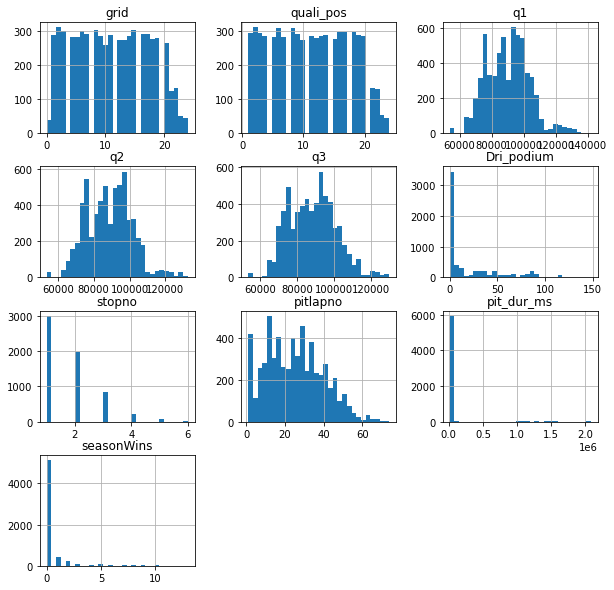

In [15]:
X_train_mvi.hist(bins = 30, figsize = (10,10))

#### Outlier Handling

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


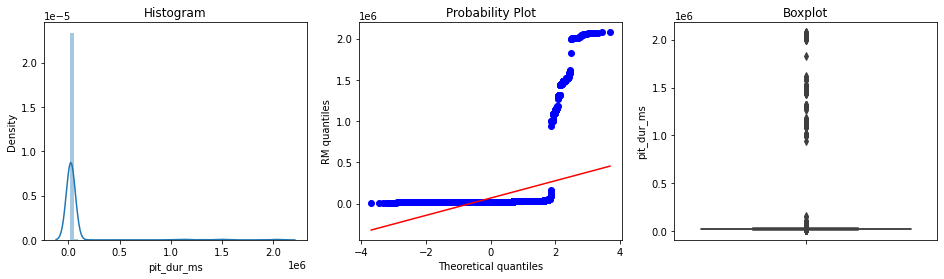

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


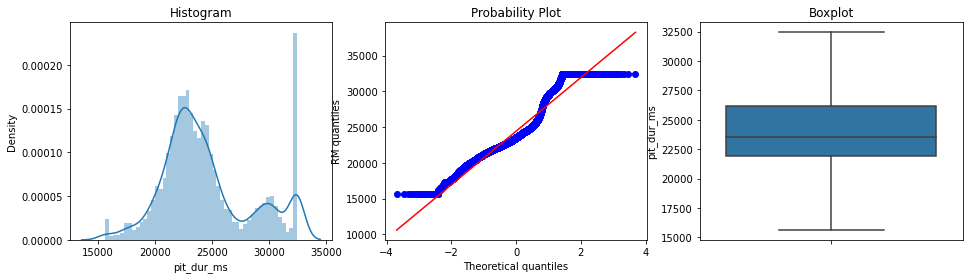

In [16]:
diagnostic_plots(X_train_mvi, 'pit_dur_ms')
windsorizer = Winsorizer(capping_method ='iqr', tail='both', fold = 1.5, variables=['pit_dur_ms'])
windsorizer.fit(X_train_mvi)
X_train_out = windsorizer.transform(X_train_mvi)
X_test_out = windsorizer.transform(X_test_mvi)
diagnostic_plots(X_train_out, 'pit_dur_ms')

array([[<AxesSubplot:title={'center':'grid'}>,
        <AxesSubplot:title={'center':'quali_pos'}>,
        <AxesSubplot:title={'center':'q1'}>],
       [<AxesSubplot:title={'center':'q2'}>,
        <AxesSubplot:title={'center':'q3'}>,
        <AxesSubplot:title={'center':'Dri_podium'}>],
       [<AxesSubplot:title={'center':'stopno'}>,
        <AxesSubplot:title={'center':'pitlapno'}>,
        <AxesSubplot:title={'center':'pit_dur_ms'}>],
       [<AxesSubplot:title={'center':'seasonWins'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

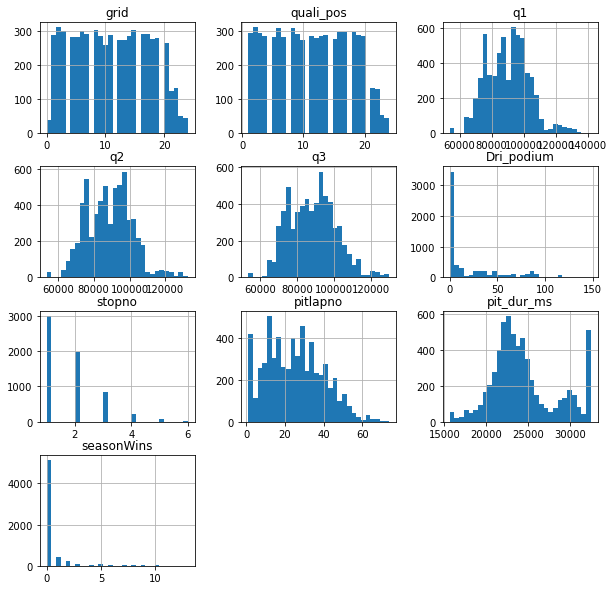

In [17]:
X_train_out.hist(bins = 30, figsize = (10,10))

#### Categorical Data Encoding

In [18]:
ord_enc = OrdinalEncoder(
    encoding_method='arbitrary',
    variables=['constructorRef','driverRef','circuitRef'])
ord_enc.fit(X_train_out)
ord_enc.encoder_dict_
X_train_cde = ord_enc.transform(X_train_out)
X_test_cde = ord_enc.transform(X_test_out)
display(X_train_cde.head())

C:\ProgramData\Anaconda3\lib\site-packages\feature_engine\encoding\base_encoder.py:193: UserWarning: During the encoding, NaN values were introduced in the feature(s) driverRef.
  warnings.warn(


,grid,quali_pos,q1,q2,q3,Dri_podium,stopno,pitlapno,pit_dur_ms,constructorRef,driverRef,circuitRef,seasonWins
6210,3,3,92878.0,93316.0,92667.0,79,4,39,21189.0,0,0,0,1
5730,8,8,72428.0,72360.0,72104.0,0,1,20,32435.0,1,1,1,0
2850,14,15,88017.0,87665.0,102056.0,3,1,2,32435.0,2,2,2,0
7273,2,2,94579.0,93797.0,93119.0,146,2,37,23676.0,3,3,3,5
7386,9,10,97537.0,97011.0,97842.0,1,1,21,22342.0,4,4,3,1


In [19]:
traind = X_train_out['driverRef'].unique()
testd = X_test_out['driverRef'].unique()
for driver in testd:
    if driver not in traind:
        print("Missing driver:",driver)

Missing driver: aitken


In [20]:
missingval = X_test_cde[X_test_cde['driverRef'].isnull()].index.tolist()
print(missingval)

print(X_test_cde.shape)
print(y_test.shape)

X_test_ord = X_test_cde.drop(labels = missingval)
y_test_ord = y_test.drop(labels = missingval)

print(X_test_ord.shape)
print(y_test_ord.shape)

[6430, 6428, 6429]
(2632, 13)
(2632,)
(2629, 13)
(2629,)


#### Numerical Transformation

array([[<AxesSubplot:title={'center':'q1'}>,
        <AxesSubplot:title={'center':'q2'}>],
       [<AxesSubplot:title={'center':'q3'}>, <AxesSubplot:>]],
      dtype=object)

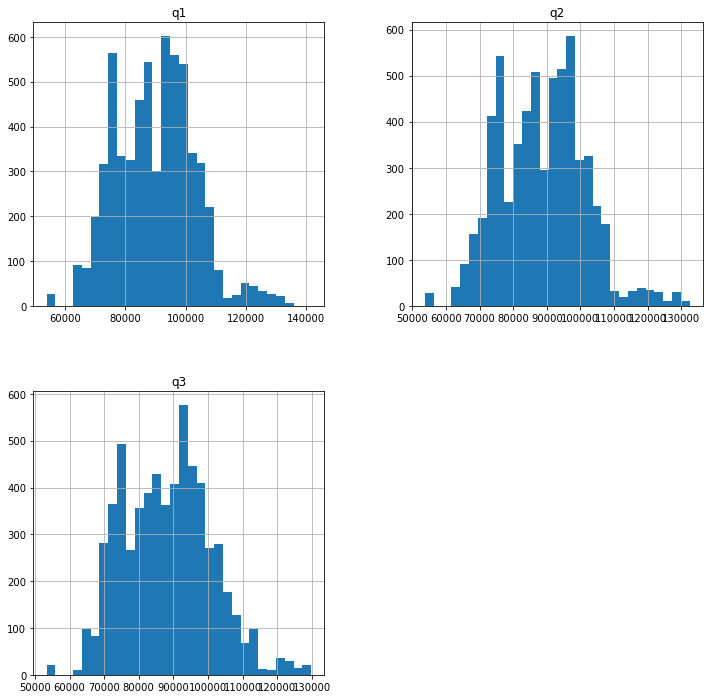

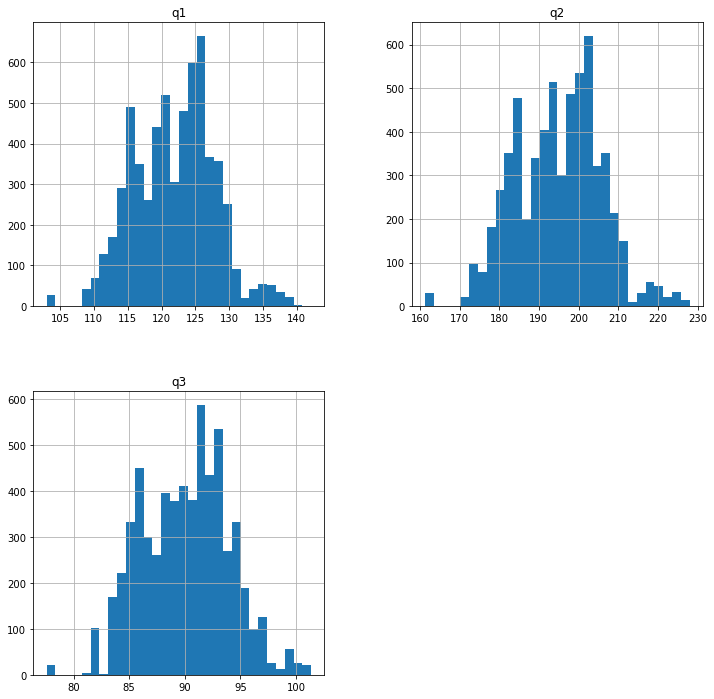

In [21]:
X_train_cde.hist(column = ['q1','q2','q3'], bins= 30, figsize = (12,12))
yjt = YeoJohnsonTransformer(variables = ['q1','q2','q3'])
yjt.fit(X_train_cde)
X_train_yjt = yjt.transform(X_train_cde)
X_test_yjt = yjt.transform(X_test_ord)
X_train_yjt.hist(column = ['q1','q2','q3'], bins= 30, figsize = (12,12))

#### Discretisation

array([[<AxesSubplot:title={'center':'q1'}>,
        <AxesSubplot:title={'center':'q2'}>],
       [<AxesSubplot:title={'center':'q3'}>,
        <AxesSubplot:title={'center':'pit_dur_ms'}>]], dtype=object)

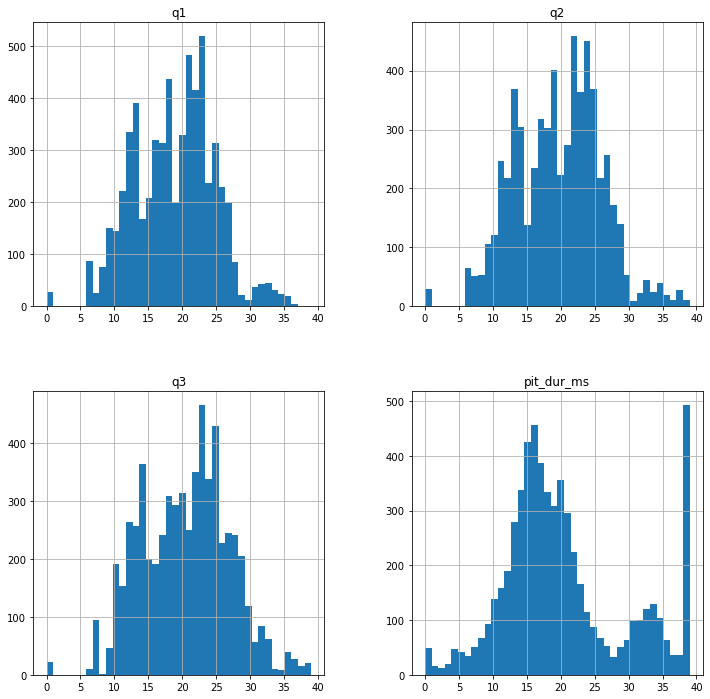

In [22]:
disc = EqualWidthDiscretiser(bins=40, variables = ['q1','q2','q3','pit_dur_ms'])
disc.fit(X_train_yjt)
train_t = disc.transform(X_train_yjt)
test_t = disc.transform(X_test_yjt)
train_t.hist(column = ['q1','q2','q3','pit_dur_ms'], bins=40, figsize=(12,12))

#### Standardization

In [23]:
scaler = MinMaxScaler()
scaler.fit(train_t)
X_train_scaled = scaler.transform(train_t)
X_test_scaled = scaler.transform(test_t)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=train_t.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=test_t.columns)
display(X_train_scaled.describe())

,grid,quali_pos,q1,q2,q3,Dri_podium,stopno,pitlapno,pit_dur_ms,constructorRef,driverRef,circuitRef,seasonWins
count,6141.000000,6141.000000,6141.000000,6141.000000,6141.000000,6141.000000,6141.000000,6141.000000,6141.000000,6141.000000,6141.000000,6141.000000,6141.0000
mean,0.457729,0.439838,0.483405,0.504971,0.526228,0.136117,0.152809,0.329405,0.523330,0.363660,0.324972,0.392800,0.0361
std,0.261467,0.271534,0.156155,0.165299,0.168825,0.212397,0.184322,0.198463,0.235038,0.264559,0.252019,0.273079,0.1135
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
25%,0.250000,0.217391,0.358974,0.358974,0.384615,0.000000,0.000000,0.164384,0.358974,0.142857,0.121212,0.156250,0.0000
50%,0.458333,0.434783,0.487179,0.512821,0.538462,0.013514,0.200000,0.328767,0.461538,0.333333,0.257576,0.375000,0.0000
75%,0.666667,0.652174,0.589744,0.615385,0.641026,0.216216,0.200000,0.465753,0.615385,0.523810,0.469697,0.593750,0.0000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000


### Step 4: Machine Learning Modelling <a id = "s4">

In [24]:
#Assigning new variables in case of any changes to the original sets during model evaluation
X_train_final =X_train_scaled 
X_test_final = X_test_scaled
y_train_final = y_train 
y_test_final = y_test_ord
print(X_train_final.shape, X_test_final.shape, y_train_final.shape, y_test_final.shape)

(6141, 13) (2629, 13) (6141,) (2629,)


In [25]:
#Naive Baseline Model
print("Naive Baseline Model:\n")
mean_target_value = y_train_final.mean()
print(f"The train mean target value is {mean_target_value:.2f}.")
y_train_preds_naive = [round(mean_target_value,2) for row in X_train_final.iloc[:,0]]
print(y_train_preds_naive[0:5])

mean_target_value = y_test_final.mean()
print(f"The test mean target value is {mean_target_value:.2f}.")
y_test_preds_naive = [round(mean_target_value,2) for row in X_test_final.iloc[:,0]]
print(y_test_preds_naive[0:5])

# Mean Squared Error
# Train MSE score
y_true = y_train_final
y_pred = y_train_preds_naive
train_mse_naive = mean_squared_error(y_true, y_pred)
print(f"The Naive Baseline Model's MSE on train data is {train_mse_naive:.2f}.")

# Test MSE score
y_true = y_test_final
y_pred = y_test_preds_naive
test_mse_naive = mean_squared_error(y_true, y_pred)
print(f"The Naive Baseline Model's MSE on test data is {test_mse_naive:.2f}.")
print()

# Root Mean Squared Error
# Train RMSE score
y_true = y_train_final
y_pred = y_train_preds_naive
train_rmse_naive = mean_squared_error(y_true, y_pred, squared=False)
print(f"The Naive Baseline Model's RMSE on train data is {train_rmse_naive:.2f}.")

# Test RMSE score
y_true = y_test_final
y_pred = y_test_preds_naive
test_rmse_naive = mean_squared_error(y_true, y_pred, squared=False)
print(f"The Naive Baseline Model's RMSE on test data is {test_rmse_naive:.2f}.")
print()

# R2 Value
# Train R2 score
y_true = y_train_final
y_pred = y_train_preds_naive
train_r2_naive = r2_score(y_true, y_pred)
print(f"The Naive Baseline Model's R2 on train data is {train_r2_naive:.2f}.")

# Test R2 score
y_true = y_test_final
y_pred = y_test_preds_naive
test_r2_naive = r2_score(y_true, y_pred)
print(f"The Naive Baseline Model's R2 on test data is {test_r2_naive:.2f}.")


Naive Baseline Model:

The train mean target value is 92475.53.
[92475.53, 92475.53, 92475.53, 92475.53, 92475.53]
The test mean target value is 92564.78.
[92564.78, 92564.78, 92564.78, 92564.78, 92564.78]
The Naive Baseline Model's MSE on train data is 157460019.61.
The Naive Baseline Model's MSE on test data is 152029006.62.

The Naive Baseline Model's RMSE on train data is 12548.31.
The Naive Baseline Model's RMSE on test data is 12330.00.

The Naive Baseline Model's R2 on train data is -0.00.
The Naive Baseline Model's R2 on test data is -0.00.


In [26]:
# Linear Regression Model
model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train_final, y_train_final)

print("Linear Regression Model:\n")
print('train_mse:', mean_squared_error(y_train_final, model_linear_regression.predict(X_train_final)), 
      '\n test_mse:', mean_squared_error(y_test_final, model_linear_regression.predict(X_test_final)))
print('train_r-sq:', r2_score(y_train_final, model_linear_regression.predict(X_train_final)), 
      '\n test_r-sq:', r2_score(y_test_final, model_linear_regression.predict(X_test_final)))

Linear Regression Model:

train_mse: 29048153.344513535 
 test_mse: 24380224.405361634
train_r-sq: 0.8155204513674463 
 test_r-sq: 0.8396343898578585


### Report <a id = "rep">


### Table of Contents

* [Introduction](#intro)
* [Problem Formulation](#pf)
    * [Loading/Exploring Data](#le)
    * [Understanding the Data](#und)
    * [Prediction Problem](#pred)
* [Data Wrangling](#dw)
    * [Extraction/Creation of features](#ex)
    * [Merging Tables](#mer)
* [Data Cleansing and Transformation](#dct)
    * [Missing Values and Outliers](#mv)
    * [Categorical Data](#cd)
    * [Numerical Data](#nd)
* [Machine Learning Model](#ml)
    * [Rows and Columns](#cou)
    * [Building and Evaluation](#mod)
* [Summary](#sum)
    * [Summarized findings](#sf)
    * [Improvements](#fi)

### Introduction with Value Based Problem Statement <a id = "intro">
    
We are provided with a large array of data for Formula 1 races from the start of the sport until today. In Formula 1, there is a Constructors championship and Drivers championship and the winners are decided based on points attained from the races. The higher position they get, the more points they obtain. Points are important as shown by 2021's F1 season where Max Verstappen, driving under Red Bull, won the Championship with 395.5 points, just 8 points ahead of the 1st runner up at 387.5 points. Another way that drivers can get an extra point is to score the fastest lap in the race. There have been multiple occasions where teams would sacrifice a position to obtain the fastest lap or take that title away from an opponent. To obtain the point, they would also have to be in the top 10 finishers. So, how do we tell ahead of time the driver that will get the fastest lap time?

### Problem Formulation <a id = "pf">
#### Loading and Exploration <a id = "le">
Prior to creating charts and manipulating the data, we want to be familiar with the dataset, such as the data types and the different data provided. For the majority of understanding the data, we can take a look at the data dictionary, which shows us the features in each table, their data types, description and more. We can then look for common features between tables which would help us to piece the data together. 
    
By loading the data into Jupyter Notebook and calling `.head()`, we can see a sample of the data in the dataset. In exploration, we can also plot charts that show us the different data in each column or identify relationships between features. We can also go ahead and compare the data in Jupyter Notebook to the information in the data dictionary to see if there are any discrepancies between the two. With this, we can see that there are differences for multiple tables in terms of data types for columns and the existence of some features.
    
#### Understanding the Data <a id = "und">
In this dataset, we are provided with all the information about F1 from 1950 onwards. The datasets give us information about the circuits, constructors, drivers and races. Most of the tables give us multiple information except the Season and Status data, which provides us with the wikipedia link for each year and the description of each StatusID respectively.
    
In each F1 Season, there are multiple races which take place on different circuits around the world. There is also a constructors championship and drivers championship for each season. The championships are decided by who gets the most points by the end of the season, and points are attained when drivers finish in the top 10 of the race. Prior to the race, drivers go through a qualifying session, and their fastest lap time determines their starting position for the race.
    
#### Prediction Problem <a id = "pred">
An important part of the races is the lap times and lap speed of the drivers. These are dependent on multiple factors, whereby the main ones are the performance of the cars, the drivers' skill and the circuit, as different circuits would incur different timings and speed. The performance of the cars is also dependent on the constructors, as certain constructors have been known to produce better and faster cars.
    
As such, a potential prediction problem I have come up with is predicting the fastest lap time on a circuit. The data that will be taken to predict the fastest lap time include the circuit, driver, constructor, grid placement and more. Since the data will be used to predict a continuous value, my prediction problem will be a regression problem.



### Data Wrangling: Multiple Tables <a id = "dw">
#### Extract and Create Features <a id = "ex">
For the year column, I changed the ‘date’ column of the race data to the data type ‘datetime’ and extracted the year with `.dt.year`. Prior to this, there were errors for some dates where they would be an extra ‘1’ in front of the years. As such, I wrote a code to look for and rectify the error if it existed. This then allowed me to change the data type without any errors. Having the date column in the datetime data type also allowed me to properly use it such as extracting features if necessary or comparing dates.
    
I created a new column with the name `‘Dri_podium’`. This column counts the number of times a driver has been on the podium (top 3). To avoid using future data, I created a subset of data for the driver’s races before the race and counted the number of times they scored top 3. This column could help us identify the performance of a driver throughout their F1 race history, as opposed to `’wins’` in the Drivers table, which is a cumulative count of a driver’s wins in that season.
 
#### Merge Tables <a id = "mer">
When merging tables, we only want to merge the data that we need. This ensures that when we reference the dataframe in our code, the runtime would be shorter as it does not need to load data that we will not be using.
    
For my data, the tables that I have merged are results, qualifying, constructors, drivers, driver standings, pit stops, race and circuit. In the different tables, there were also columns with the same names but representing different things. When merging, pandas would handle this similarity by adding a suffix at the end of the column ( _x, _y) to differentiate the 2 columns. For clearer understanding and data handling, I have went ahead and renamed such columns to a more unique and distinct name. I also renamed existing columns that might have vague names such as ‘stop’ and ‘milliseconds’ in the Pit Stops data.
As for the data I have chosen, for all the tables I am merging, I have only selected columns that I will be using as well as the identifier columns. I have also merged the data on 2 columns where necessary such as results and qualifying with `on = [‘raceId’, ‘driverId’]` as a raceId might have multiple driverId(s).

For Results, the columns merged were the grid, fastestLapTime and positionOrder. PositionOrder was only merged in for the creation of the Dri_podium column before it was dropped. For results, I opted not to merge the milliseconds column as comparison between the fastestLapTime and milliseconds showed discrepancies even though they were meant to be the same. For Constructor, Driver and Circuit, the columns chosen were the reference columns (ConstructorRef, CircuitRef, DriverRef). 
For constructors, drivers and circuit, the columns that I wanted to add were the Reference columns, which were their unique identifiers. The purpose of including the reference values were so that they would correspond to a single object and would not have the possibility of linking to more than 1 objects. I also opted not to use the ‘number’ column for drivers as there were drivers that were missing a permanent driver number.

As for the race table, I merely included it so as to be able to link the circuits to the rest of the data. For Pit stops, I chose to keep the milliseconds column instead of the duration column as the 2 were matching values. Furthermore, choosing to handle the time-data on hand in milliseconds gave me uniformity across the different tables. Lastly, for driver standings, the additional column merged was ‘wins’, the season win count for a driver. The reason for including pit stops in my data to be used is so that teams will be able to input different values and strategies such as lap number to pit on or number of pit stops and see how that would affect them obtaining the Fastest Lap Time.

Calling `.head()` on our data would immediately provide us with a preview of our data and we can see that there were values of ‘\\N’ which represents null values. These caused a majority of our data to be listed as objects which might prove disruptive to our data wrangling and transformation. Hence, with the code ` data.replace('\\N',np.nan,inplace=True)`, a replacement was done to change these values to actual NaN values so as to be able to identify them appropriately and make changes. 

Referring back to our time columns, apart from the pit duration being in milliseconds, the columns ‘q1’, ‘q2’, ‘q3’ and ‘fastestLapTime’ were in their own unique format of time in minutes and seconds. With a block of code, these values were all changed to milliseconds. Another method I have identified was changing the columns to the datetime format and extracting the time in milliseconds, but I ran into some errors with the formatting.

Last but not least, we may drop the Identifier and date columns as they would not be needed. We can also rectify the data types of the columns since ‘\\N’ was replaced and would not force the columns to be listed as objects. We can then go ahead with our data cleansing and transformation.
 


### Data Cleansing and Transformation <a id = "dct">
For data cleansing and transformation, after every step, I have assigned the changes to a new variable. This allows me to clearly see which step I am on, and also backtrack and compare the differences before/after the changes. If I were to keep the same variable throughout, I would have to rerun the notebook to see the changes at every step. I have also chosen to make use of Feature Engine as opposed to Scikit-learn due to how the data is handled in the dataframe format as opposed to numpy arrays, which would also change the order of the columns.

For my X sets, the continuous data I have are q1, q2, q3 and pit_dur_ms. The discrete data are grid, quali_pos, pitlapno, stopno, seasonWins and Dri_podium. The categorical data I have are constructorRef, driverRef and circuitRef.

#### Missing Values and Outliers <a id = "mv">
For missing values, after changing ‘\\N’ to NaN values, I found that the columns that had missing values were fastestLapTime, q1, q2 and q3. For the qualifying columns, the number of missing values range from 90 to 5000, while there were only 18 null values for fastestLapTime.
Since the data I was using had over 8000 rows, I decided to drop the null rows for fastestLapTime as they made up less than 0.3% of the data. The fastest lap time was also going to be our target value and we do not want to have estimated values when performing our prediction. Even if we had performed missing value imputation, it would not significantly improve our model (if at all). I then split the data into their respective training and testing sets before moving on.
    
As for the qualifying columns, I used Feature Engine's random sample imputer to replace the missing values. Removing the rows with the null values was not an option as they took up a larger part of our dataset and would greatly affect our training and testing data accuracy. I have tried to use other imputation methods such as median/mode or end-of-tail but this greatly affected the distribution, with a significantly large number of chosen values as opposed to the rest of the values. Further data transformation such as numerical transformation or discretization were not effective in smoothing the curve. As such, I used the random sample imputer as it allowed me to keep the original distribution, which was closer to a normal distribution.

As for outliers, for the continuous data, q1, q2 and q3 have a relatively normal distribution with no distinct outliers. However, for pit duration, there are extreme outliers. I performed winsorization on the feature, with `capping_method = ‘iqr’, tail = ‘both’, fold = 1.5`. Due to the number of upper outliers, the change gave me a normal distribution but a large density of values at the end.

#### Categorical Data<a id = "cd">
For categorical data, the categorical columns I had were driverRef, constructorRef and circuitRef. We want to go ahead and transform the strings into values so that they may be used in our machine learning model. I went ahead and made use of Ordinal Encoder. These helps us to navigate through the assigned digits to find patterns relating to the target. We are also able to retain our distinct values, as opposed to methods like One Hot Encoding which we have to select a number of top categories to retain.

During the ordinal encoding, I noticed that NaN values were set in X_test. A quick comparison between X train and X test showed that they was a driver in X test that did not exist in X train. Hence, when the ordinal encoder was fitted with X train, it caused NaN values in X test due to the driver not existing in the encoder. My solution to this was removing the records with NaN in X_test since there were only 3 missing out of the 2632 rows, making up only 0.1%. Since X_test and Y_test had to be of matching shapes, I extracted the index of the missing records and remove said records from both test sets.
    
#### Numerical Data <a id = "nd">

For numerical transformation, this helps with skewed variables, but is not always necessary. We can use trial and error to see if this transformation causes an improvement in our model performance. In the code, I went ahead and tested out the different methods but none seemed to make a significant difference. In the end, I used the YeoJohnsonTransformer as it seemed to help make the distribution slightly more normal for the q1, q2 and q3 variables. I did not use it on pit_dur_ms as performing a numerical transformation on it made the distribution right-skewed.

For discretization, I used it on the continuous variables, q1, q2, q3 and pit_dur_ms. These changed the values into sets of discrete variables, which would also help with skewed distributions or outliers. The discretization method used was intervals of equal width and I set `bins = 40`.

Last but not least, we have to perform feature scaling. This is because the machine learning algorithms are sensitive to the magnitude of the values. With the numerical values of the milliseconds column being millions higher than other variables like grid or pitno, the model cannot compare feature importance effectively. Hence, adjusting these values to be of a similar scale allow us to improve its performance and efficiency. The method I have done is Min-Max normalization, which scales the values between 0 and 1. We can then call `X_train_scaled.describe()` to see the range of new values in the columns.


### Machine Learning Model <a id = "ml">
#### Count of Rows and Columns <a id = "cou">
In the final train and test sets before building our machine learning model, our sets had sufficient data.    
X-train: (), X-test: (), Y-train: (), Y-test: ()
With the size of data that we have, this ensures that our predictions are not unrealistic and have enough to build a reliable model.    
    
#### Building and Evaluation of model <a id = "mod">
The 2 models built are the Naive Baseline Model as well as the Linear Regression Model. Comparing the 2 models allow us to evaluate how accurate the linear regression model. Before the comparison and making of the model, we want to ensure that the training and test sets that we pass into the model are identical, in terms of data, rows and columns. This ensures that any changes in model performance is not due to possible changes in the data.

Our prediction problem is a regression problem. For the Naïve Basline Model, the mean of Train Target Value is typically predicted. Hence, the same mean value is used for all rows in our train set, which is 92475.53 for train and 92564.78 for test. An MSE is then calculated between the train/test set and their respective mean value. The value returned is the average squared distance between the observed and predicted values, hence a number closer to 0 is better. From our model, we can see that our MSE for train and test data is over 150 million, which is a pretty high value. 
We also identify the Root Mean Squared Error, which is the  difference between the prediction and factual values. Lastly, we have another measurement, the R-squared value. The R squared value is a measure that tells us what percentage of fastestLapTime can be explained by independent variables(the other factors). Given that our y2_pred for the Naïve Baseline Model is fixed, we are left with a R2 value of -0.00.

Moving on to our Linear Regression Model, we can compare the measurements of the model to our Naïve Baseline Model. The MSE measures for our train and test sets are under 30 million, around an 80% decrease from the Naïve Model. The R-squared value for our train and test sets are also 0.81 and 0.84 respectively, which means that around 80% of the fastestLapTimes can be explained by the other factors. As good as this value might seem, we have to be careful not to overfit our data or let data leakage happen, leading to falsely accurate models. In comparison to our Naive Baseline Model, for the Linear Regression model, we use the .predict() method on our model. The .predict() method returns the labels of the arguments passed into it based on the trained data.

### Summary and Improvements <a id = "sum">
#### Summarized Findings <a id = "sf">

The target value was the fastestLapTime for a race and it was based on multiple factors such as Driver, Constructors and more.
After data cleansing and transformation, through the Linear Regression Model, I obtained a Mean Square Error Value of 30.0 million for my Train set and 24.8 million for my Test set. My R-Squared values are 0.81 and 0.84 for Train and Test sets respectively. 

#### Further Improvements <a id = "fi">
    
Improvement that could be made are to employ different transformation/cleansing methods for each column based on which is more useful. The method chosen might also be better in theory based on our data, but might not make a significant difference practically. As always, the model is only as good as the data being fed into it.
